<a href="https://colab.research.google.com/github/hwankang/Deep-Chemometrics/blob/master/16(mon)_jan__11_00__r2__608_Raman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The program of deep learning with Raman data

In [1]:
import pandas as pd
import numpy as np

In [23]:
from google.colab import drive
drive.mount('/content/drive')
filename='/content/drive/MyDrive/machine_learning/123_Raman_DATA_csv.csv'
import pandas as pd
X2_df_t = pd.read_csv(filename)
X2_df_t

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,모델 포함,Y_1,Y_2,Y_3,100,101,102,103,104,...,3416,3417,3418,3419,3420,3421,3422,3423,3424,3425
0,1,True,0.152,0.554,0.706,146639.0,148544.0,150764.0,153224.0,155800.0,...,334369.0,336153.0,334933.0,333409.0,334084.0,335164.0,333873.0,331936.0,333974.0,338195.0
1,2,True,0.079,1.406,1.485,206566.0,209838.0,213493.0,217388.0,221327.0,...,294614.0,294377.0,291739.0,293169.0,296291.0,296085.0,293815.0,290288.0,287718.0,289398.0
2,3,True,0.100,2.243,2.343,218727.0,225835.0,232885.0,239820.0,246478.0,...,79871.5,76713.4,74038.4,73694.4,72858.8,69432.9,66287.1,64690.1,64200.5,65122.9
3,4,True,0.238,3.225,3.463,295718.0,303733.0,311632.0,319355.0,326706.0,...,103212.0,99360.4,95507.3,96183.6,97782.4,96121.2,93317.4,91037.1,89635.4,90149.7
4,5,True,0.415,3.744,4.159,326139.0,334950.0,343489.0,351643.0,359265.0,...,122042.0,119156.0,116189.0,117152.0,118201.0,116130.0,113295.0,110994.0,109691.0,109699.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,400,True,11.800,9.680,21.480,482293.0,483557.0,482601.0,479793.0,475776.0,...,1040000.0,1030000.0,1030000.0,1030000.0,1040000.0,1040000.0,1040000.0,1050000.0,1060000.0,1070000.0
400,401,True,11.800,9.680,21.480,484101.0,485654.0,484926.0,482202.0,478097.0,...,1040000.0,1030000.0,1030000.0,1030000.0,1040000.0,1040000.0,1040000.0,1050000.0,1050000.0,1060000.0
401,402,True,11.800,9.680,21.480,484818.0,486237.0,485386.0,482573.0,478443.0,...,1040000.0,1030000.0,1030000.0,1030000.0,1030000.0,1040000.0,1040000.0,1050000.0,1050000.0,1060000.0
402,403,True,11.200,9.120,20.320,484521.0,486353.0,485478.0,482285.0,477566.0,...,1040000.0,1040000.0,1040000.0,1040000.0,1040000.0,1040000.0,1050000.0,1050000.0,1060000.0,1070000.0


In [26]:
xx,yy=X2_df_t.shape
ai=[]
for i in range(xx):
    if X2_df_t.iloc[i,1]==False:
        ai.append(i)
X2_df=X2_df_t.drop(ai,axis=0) #
X2_df

,Unnamed: 0,모델 포함,Y_1,Y_2,Y_3,100,101,102,103,104,...,3416,3417,3418,3419,3420,3421,3422,3423,3424,3425
0,1,True,0.152,0.554,0.706,146639.0,148544.0,150764.0,153224.0,155800.0,...,334369.0,336153.0,334933.0,333409.0,334084.0,335164.0,333873.0,331936.0,333974.0,338195.0
1,2,True,0.079,1.406,1.485,206566.0,209838.0,213493.0,217388.0,221327.0,...,294614.0,294377.0,291739.0,293169.0,296291.0,296085.0,293815.0,290288.0,287718.0,289398.0
2,3,True,0.100,2.243,2.343,218727.0,225835.0,232885.0,239820.0,246478.0,...,79871.5,76713.4,74038.4,73694.4,72858.8,69432.9,66287.1,64690.1,64200.5,65122.9
3,4,True,0.238,3.225,3.463,295718.0,303733.0,311632.0,319355.0,326706.0,...,103212.0,99360.4,95507.3,96183.6,97782.4,96121.2,93317.4,91037.1,89635.4,90149.7
4,5,True,0.415,3.744,4.159,326139.0,334950.0,343489.0,351643.0,359265.0,...,122042.0,119156.0,116189.0,117152.0,118201.0,116130.0,113295.0,110994.0,109691.0,109699.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,400,True,11.800,9.680,21.480,482293.0,483557.0,482601.0,479793.0,475776.0,...,1040000.0,1030000.0,1030000.0,1030000.0,1040000.0,1040000.0,1040000.0,1050000.0,1060000.0,1070000.0
400,401,True,11.800,9.680,21.480,484101.0,485654.0,484926.0,482202.0,478097.0,...,1040000.0,1030000.0,1030000.0,1030000.0,1040000.0,1040000.0,1040000.0,1050000.0,1050000.0,1060000.0
401,402,True,11.800,9.680,21.480,484818.0,486237.0,485386.0,482573.0,478443.0,...,1040000.0,1030000.0,1030000.0,1030000.0,1030000.0,1040000.0,1040000.0,1050000.0,1050000.0,1060000.0
402,403,True,11.200,9.120,20.320,484521.0,486353.0,485478.0,482285.0,477566.0,...,1040000.0,1040000.0,1040000.0,1040000.0,1040000.0,1040000.0,1050000.0,1050000.0,1060000.0,1070000.0


In [27]:
X3_df=X2_df.iloc[:,5:]
X3_df

,100,101,102,103,104,105,106,107,108,109,...,3416,3417,3418,3419,3420,3421,3422,3423,3424,3425
0,146639.0,148544.0,150764.0,153224.0,155800.0,158297.0,160498.0,162250.0,163542.0,164511.0,...,334369.0,336153.0,334933.0,333409.0,334084.0,335164.0,333873.0,331936.0,333974.0,338195.0
1,206566.0,209838.0,213493.0,217388.0,221327.0,225052.0,228310.0,230962.0,233047.0,234760.0,...,294614.0,294377.0,291739.0,293169.0,296291.0,296085.0,293815.0,290288.0,287718.0,289398.0
2,218727.0,225835.0,232885.0,239820.0,246478.0,252605.0,257958.0,262420.0,266083.0,269223.0,...,79871.5,76713.4,74038.4,73694.4,72858.8,69432.9,66287.1,64690.1,64200.5,65122.9
3,295718.0,303733.0,311632.0,319355.0,326706.0,333419.0,339271.0,344191.0,348322.0,351983.0,...,103212.0,99360.4,95507.3,96183.6,97782.4,96121.2,93317.4,91037.1,89635.4,90149.7
4,326139.0,334950.0,343489.0,351643.0,359265.0,366171.0,372196.0,377278.0,381526.0,385220.0,...,122042.0,119156.0,116189.0,117152.0,118201.0,116130.0,113295.0,110994.0,109691.0,109699.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,482293.0,483557.0,482601.0,479793.0,475776.0,471245.0,466823.0,463048.0,460382.0,459178.0,...,1040000.0,1030000.0,1030000.0,1030000.0,1040000.0,1040000.0,1040000.0,1050000.0,1060000.0,1070000.0
400,484101.0,485654.0,484926.0,482202.0,478097.0,473353.0,468685.0,464719.0,461956.0,460733.0,...,1040000.0,1030000.0,1030000.0,1030000.0,1040000.0,1040000.0,1040000.0,1050000.0,1050000.0,1060000.0
401,484818.0,486237.0,485386.0,482573.0,478443.0,473771.0,469297.0,465630.0,463201.0,462252.0,...,1040000.0,1030000.0,1030000.0,1030000.0,1030000.0,1040000.0,1040000.0,1050000.0,1050000.0,1060000.0
402,484521.0,486353.0,485478.0,482285.0,477566.0,472245.0,467179.0,463068.0,460422.0,459528.0,...,1040000.0,1040000.0,1040000.0,1040000.0,1040000.0,1040000.0,1050000.0,1050000.0,1060000.0,1070000.0


In [28]:
#special run
n=X3_df.shape[0]-10
nn=X3_df.shape[0]-20
n=X3_df.shape[0]-20
nn=X3_df.shape[0]-60
X_df_1=X3_df.iloc[40:,:]
X_df_2=X3_df.iloc[20:40,:]
X_df_3=X3_df.iloc[0:20,:]
X_train_df=X_df_1
X_val_df=X_df_2
X_test_df=X_df_3

In [29]:
Y3_df=X2_df.iloc[:,2:5]
Y3_df

,Y_1,Y_2,Y_3
0,0.152,0.554,0.706
1,0.079,1.406,1.485
2,0.100,2.243,2.343
3,0.238,3.225,3.463
4,0.415,3.744,4.159
...,...,...,...
399,11.800,9.680,21.480
400,11.800,9.680,21.480
401,11.800,9.680,21.480
402,11.200,9.120,20.320


In [30]:
Y_df_1=Y3_df.iloc[40:,:]
Y_df_2=Y3_df.iloc[20:40,:]
Y_df_3=Y3_df.iloc[0:20,:]
y_train_df=Y_df_1
y_val_df=Y_df_2
y_test_df=Y_df_3

In [31]:
#X_train_val_df=X_train_df.append(X_val_df)
#X_train_val=X_train_val_df.values
X_train_a=X_train_df.values
X_val_a=X_val_df.values
X_test_a=X_test_df.values
y_train=y_train_df.values
y_val=y_val_df.values
y_test=y_test_df.values


In [32]:
X_train=X_train_a
X_val=X_val_a
X_test=X_test_a

In [33]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
#X_train_val=X_train_a.append(X_val_a)
#std.fit(X_train_val)
std.fit(X_train_a)
X_train=std.transform(X_train_a)
#std.fit(X_val_a)
X_val=std.transform(X_val_a)
#std.fit(X_test_a)
X_test=std.transform(X_test_a)

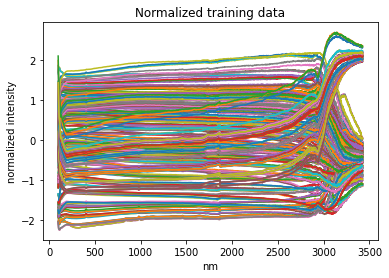

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
axisscale=np.linspace(100,3425,3326)
plt.plot(axisscale,X_train.T)
plt.xlabel('nm')
plt.ylabel('normalized intensity')
plt.title('Normalized training data')
plt.show()

In [89]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, Reshape#, MaxPooling1D
from keras.callbacks import ReduceLROnPlateau
from keras.layers.noise import GaussianNoise

In [90]:
#Hyperparameters for the network
DENSE = 128
DROPOUT = 0.5
DROPOUT = 0.1
DROPOUT = 0.4
DROPOUT = 0.3
DROPOUT = 0.5
DROPOUT = 0.025
DROPOUT = 0.25
DROPOUT = 0.0
C1_K  = 8 #Number of kernels/feature extractors for first layer
C1_S  = 32 #Width of the convolutional mini networks
C2_K  = 16
C2_S  = 32

activation='relu'
#activation='sigmoid'

input_dim = X_train.shape[1]

#The model
def make_model():
    model = Sequential()
    #Adding a bit of GaussianNoise also works as regularization
    #model.add(GaussianNoise(0.05, input_shape=(input_dim,)))
    #model.add(GaussianNoise(0.005, input_shape=(input_dim,)))
    model.add(GaussianNoise(0.005, input_shape=(input_dim,)))
    #First two is number of filter + kernel size
    model.add(Reshape((input_dim, 1)))
    #model.add(Conv1D(C1_K, (C1_S), activation=activation, border_mode='same'))
    #model.add(Conv1D(C2_K, (C2_S), border_mode='same', activation=activation))
    model.add(Conv1D(C1_K, (C1_S), activation=activation, padding='same'))
    model.add(Conv1D(C2_K, (C2_S), padding='same', activation=activation))
    model.add(Flatten())
    model.add(Dropout(DROPOUT))
    model.add(Dense(DENSE, activation=activation))
    model.add(Dense(3, activation='linear'))

    #model.compile(loss='mse', optimizer=keras.optimizers.Adadelta(lr=0.01))#, metrics=['mean_absolute_error'])
    model.compile(loss='mse', optimizer=keras.optimizers.Adam(lr=0.01))#, metrics=['mean_absolute_error'])

    return model

In [91]:
model = make_model()
print(model.summary())

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gaussian_noise_15 (Gaussian  (None, 3326)             0         
 Noise)                                                          
                                                                 
 reshape_15 (Reshape)        (None, 3326, 1)           0         
                                                                 
 conv1d_30 (Conv1D)          (None, 3326, 8)           264       
                                                                 
 conv1d_31 (Conv1D)          (None, 3326, 16)          4112      
                                                                 
 flatten_15 (Flatten)        (None, 53216)             0         
                                                                 
 dropout_15 (Dropout)        (None, 53216)             0         
                                                     

In [92]:
#h = model.fit(X_train, y_train, epochs=400, batch_size=8, validation_data=(X_val, y_val))
#h = model.fit(X_train, y_train, epochs=400, batch_size=20, validation_data=(X_val, y_val))
#h = model.fit(X_train, y_train, epochs=400, batch_size=8, validation_data=(X_val, y_val))
h = model.fit(X_train, y_train, epochs=200, batch_size=8, validation_data=(X_val, y_val))

Epoch 1/200
40/40 [==============================] - 1s 10ms/step - loss: 30362.0195 - val_loss: 49.0138
Epoch 2/200
40/40 [==============================] - 0s 7ms/step - loss: 72.6486 - val_loss: 36.3836
Epoch 3/200
40/40 [==============================] - 0s 6ms/step - loss: 33.8624 - val_loss: 13.4877
Epoch 4/200
40/40 [==============================] - 0s 6ms/step - loss: 14.3820 - val_loss: 9.0916
Epoch 5/200
40/40 [==============================] - 0s 6ms/step - loss: 8.0987 - val_loss: 6.5908
Epoch 6/200
40/40 [==============================] - 0s 6ms/step - loss: 6.4547 - val_loss: 5.4470
Epoch 7/200
40/40 [==============================] - 0s 6ms/step - loss: 4.8364 - val_loss: 5.2722
Epoch 8/200
40/40 [==============================] - 0s 5ms/step - loss: 4.3113 - val_loss: 4.0767
Epoch 9/200
40/40 [==============================] - 0s 6ms/step - loss: 3.8565 - val_loss: 4.3396
Epoch 10/200
40/40 [==============================] - 0s 5ms/step - loss: 3.7511 - val_loss: 3.402

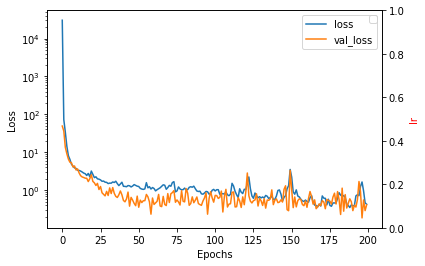

In [93]:
#import matplotlib.psplot as plt
import matplotlib.pyplot as plt
plt.plot(h.history['loss'], label='loss')
plt.plot(h.history['val_loss'], label='val_loss')

plt.yscale('log')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
ax2 = plt.gca().twinx()
#ax2.plot(h.history['lr'], color='r')
ax2.set_ylabel('lr',color='r')

_ = plt.legend()

1/1 [==============================] - 0s 17ms/step


Text(0, 0.5, 'predicted value')

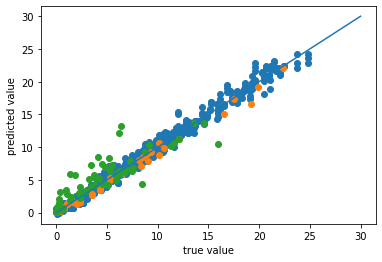

In [94]:
plt.scatter(y_train, model.predict(X_train))
plt.scatter(y_val, model.predict(X_val))
plt.scatter(y_test, model.predict(X_test))
plt.plot([0,30],[0,30]) # Y = PredY line
plt.xlabel('true value')
plt.ylabel('predicted value')

In [95]:
pred_Y_df=model.predict(X_test)
Y_df_true=y_test

1/1 [==============================] - 0s 21ms/step


In [96]:
from sklearn.metrics import mean_squared_error, r2_score
mse= mean_squared_error(Y_df_true, pred_Y_df)
rmse=np.sqrt(mse)
r2=r2_score(Y_df_true, pred_Y_df)
print('MSE : {: 0.3f}, || RMSE : {: 0.3f}, || R2 : {: 0.3f}'.format(mse,rmse,r2))

MSE :  4.542, || RMSE :  2.131, || R2 :  0.608


#The end of program